In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Model
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
import cv2
import urllib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Flatten, Dropout,GlobalAveragePooling2D,Concatenate, concatenate
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from shutil import copy
from shutil import rmtree
import cv2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models
import tensorflow as tf
from skimage import data, color, io, img_as_float
import pandas as pd
#from scipy.misc import imresize

2024-02-29 02:28:39.282524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 02:28:39.398449: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 02:28:39.913920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-02-29 02:28:39.913973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
from tensorflow import keras
model = keras.models.load_model('/home/lucas/dataset_chest/classificacao_multilabel_chest/records/model_v5_e81647f8/model_0.500')

2024-02-29 02:28:46.624626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-29 02:28:46.668225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-29 02:28:46.671635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-29 02:28:46.675218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1_2 (InputLayer)         [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 random_crop_2 (RandomCrop)     (None, 224, 224, 3)  0           ['input_1_2[0][0]']              
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['random_crop_2[0][0]']          
 D)                                                                                               
                                                                                              

In [4]:
model = tf.keras.applications.VGG16()

553467096/553467096 [==============================] - 17s 0us/step


2024-02-29 01:41:35.603022: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


In [5]:
def resize(width, height, img):
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized 

In [7]:
df = pd.read_csv("df_ori_mask_crop.csv")

In [8]:
df

,Unnamed: 0,Image Index,Patient ID,Finding Labels,path,path_masks,path_crop,Atelectasis,Cardiomegaly,Consolidation,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,00000001_000.png,1,Cardiomegaly,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_000.png...,./dataset/mask_chest_crop/00000001_000.png,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,00000001_001.png,1,Cardiomegaly|Emphysema,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_001.png...,./dataset/mask_chest_crop/00000001_001.png,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2,00000001_002.png,1,Cardiomegaly|Effusion,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000001_002.png...,./dataset/mask_chest_crop/00000001_002.png,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,00000002_000.png,2,No Finding,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000002_000.png...,./dataset/mask_chest_crop/00000002_000.png,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,00000003_001.png,3,Hernia,./dataset/CXR8/images/images_001/images/000000...,./dataset/mask_chest/images_0/00000003_001.png...,./dataset/mask_chest_crop/00000003_001.png,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,112115,00030801_001.png,30801,Mass|Pneumonia,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030801_001.p...,./dataset/mask_chest_crop/00030801_001.png,0,0,0,...,0,0,0,0,1,0,0,0,1,0
112116,112116,00030802_000.png,30802,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030802_000.p...,./dataset/mask_chest_crop/00030802_000.png,0,0,0,...,0,0,0,0,0,1,0,0,0,0
112117,112117,00030803_000.png,30803,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030803_000.p...,./dataset/mask_chest_crop/00030803_000.png,0,0,0,...,0,0,0,0,0,1,0,0,0,0
112118,112118,00030804_000.png,30804,No Finding,./dataset/CXR8/images/images_012/images/000308...,./dataset/mask_chest/images_112/00030804_000.p...,./dataset/mask_chest_crop/00030804_000.png,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
img = '00013118_008.png' 

if img in df['Image Index'].values:
  print('Image exists in DataFrame')
  row = df[df['Image Index'] == img]
  path = row['path'].values[0]
  label = row['Finding Labels'].values[0]
  print(path)
  print(label)
else:
  print('Image does not exist in DataFrame')

Image exists in DataFrame
./dataset/CXR8/images/images_006/images/00013118_008.png
Atelectasis


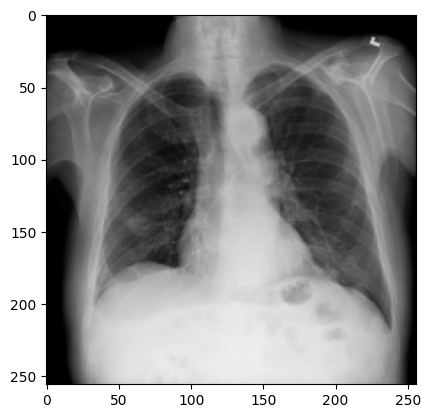

In [20]:
import cv2
img = cv2.imread("./dataset/CXR8/images/images_006/images/00013118_008.png")
img = resize(256, 256, img)
plt.imshow(img)

In [25]:
def get_heatmap(vgg_conv, processed_image, class_idx):

    eps=1e-8
    
    gradModel = Model(
            inputs=[vgg_conv.inputs],
            outputs=[vgg_conv.get_layer('block5_conv3').output, vgg_conv.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(processed_image, tf.float32)
        (convOutputs, predictions) = gradModel(inputs)
        loss = predictions[:, class_idx]

    # use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)
        
    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads


    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    (w, h) = (processed_image.shape[2], processed_image.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))


    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    heatmap = (heatmap * 255).astype("uint8")
    return heatmap

In [26]:
def print_GradCAM(base_model, sample_image):

    sample_image_processed = np.expand_dims(sample_image, axis=0)

    # get the label predicted by our original model
    pred_label = np.argmax(base_model.predict(sample_image_processed), axis=-1)[0]
    print(base_model.predict(sample_image_processed))

    # get the heatmap for class activation map(CAM)
    heatmap = get_heatmap(base_model, sample_image_processed, pred_label)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
#     heatmap = 255 - heatmap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # f,ax = plt.subplots(1,2, figsize=(16,6))
    plt.figure()
    f, ax = plt.subplots(ncols=2, figsize=(16, 6))


    #superimpose the heatmap on the image    
    sample_image_hsv = color.rgb2hsv(sample_image)
    heatmap = color.rgb2hsv(heatmap)

    alpha=0.7
    sample_image_hsv[..., 0] = heatmap[..., 0]
    sample_image_hsv[..., 1] = heatmap[..., 1] * alpha

    img_masked = color.hsv2rgb(sample_image_hsv)

    # f,ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].imshow(sample_image)
    #ax[0].set_title(f"original image (predicted label: {target_names[pred_label]})")
    ax[0].axis('off')

    ax[1].imshow(img_masked)
    #ax[1].set_title("superimposed image")
    ax[1].axis('off')

    plt.show()

1/1 [==============================] - 0s 18ms/step
[[2.53553344e-06 1.63725554e-03 5.11761697e-04 6.60793914e-04
  1.16422947e-03 1.10631227e-04 3.65661654e-05 5.13394625e-05
  3.90017340e-05 7.30687543e-06 1.63454399e-06 3.01064438e-06
  7.52634924e-06 1.16972169e-05 1.61912567e-06 6.85900432e-06
  6.96643974e-06 1.06856378e-05 3.96172936e-06 3.60471167e-05
  7.92483843e-06 5.70814518e-06 2.16277003e-05 9.77925520e-05
  3.58164789e-06 1.40010900e-06 1.02453560e-05 4.41051725e-06
  2.36969640e-06 2.37815594e-03 4.40733811e-06 1.68134666e-05
  3.48075400e-06 1.76944290e-04 2.64005037e-04 6.52805829e-06
  2.33886676e-05 3.18308707e-06 4.70013174e-06 7.81775379e-05
  1.41218816e-05 2.19586218e-06 6.13806060e-06 4.73979298e-06
  6.88146429e-06 9.23554035e-06 2.06060267e-05 1.47284788e-06
  8.58946078e-06 2.71697149e-06 2.23208153e-05 3.09822608e-05
  2.90442767e-05 6.82201562e-06 1.02867207e-05 1.22496622e-05
  1.06475427e-05 8.05653713e-07 6.62875436e-06 1.90227602e-05
  2.88753108e-05 2

<Figure size 640x480 with 0 Axes>

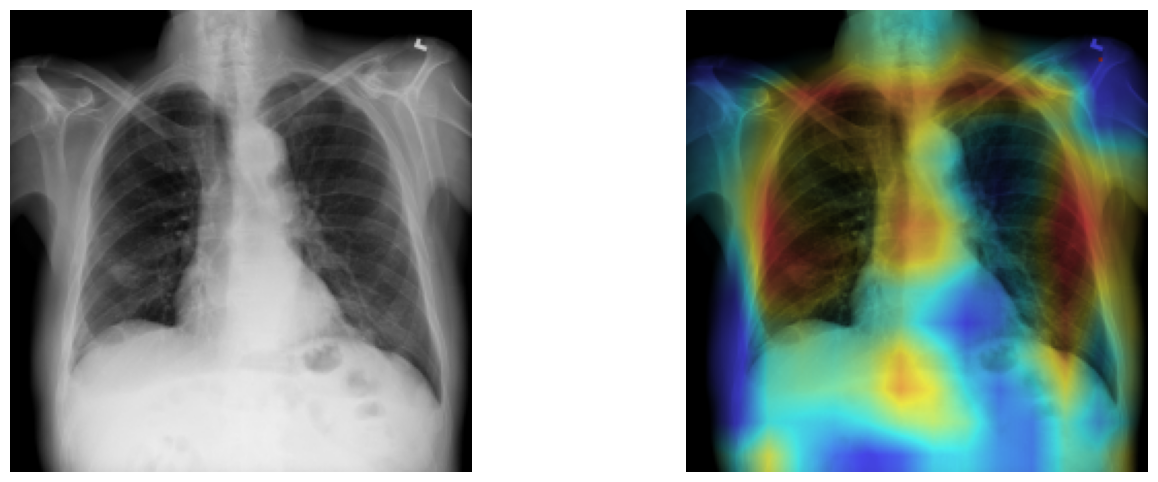

In [27]:
img_path = "./dataset/CXR8/images/images_006/images/00013118_008.png"
img = cv2.imread(img_path)
img = resize(224, 224, img)
print_GradCAM(model, img)